## Part 1 - Hands-on - pandas

The most famous library to manipulate data is `pandas`. It provides a large amount of functionalities similar to SAS (select, groupby, filter, etc.). 

The library is particularly well-suited for handling and manipulating structured data, such as CSV, Excel spreadsheets or SQL tables.

`pandas` plays a crucial role in the entire data science workflow, from initial data exploration and cleaning to advanced data analysis and modeling.

### Installation and Importing

In [ ]:
# install pandas
! pip install pandas

In [1]:
#import of the library: we tag it as np to avoid us writting the full name each time
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

c:\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Basic data structures in pandas


Pandas provides two types of classes for handling data:

* **Series**: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.

* **DataFrame**: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

### Exercice 1: Object creation

1. Creating a Series by passing a list of values, letting pandas create a default RangeIndex.


In [2]:
data = [1, 3, 5, np.nan, 6, 8]

serie = pd.Series(data)

serie

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
serie.dtypes

dtype('float64')

2. Let's assume that the variable `data` is a list that contains our data.

An observation corresponds to a dictionary that contains the name, type, atmosphere and rating of a restaurant.

It is easy to transform this list into a dataframe using the 'DataFrame' function.

In [4]:
data = [{"name": "Little Pub", "type" : "Bar", "atmosphere": 9, "rating": 7},
     {"name": "Le Corse", "type" : "Sandwicherie", "atmosphere": 2, "rating": 8},
     {"name": "Café Caumartin", "type" : "Bar", "atmosphere": 1}]

df_restaurant = pd.DataFrame(data)

df_restaurant

,name,type,atmosphere,rating
0,Little Pub,Bar,9,7.0
1,Le Corse,Sandwicherie,2,8.0
2,Café Caumartin,Bar,1,NaN


In [5]:
df_restaurant.describe(include= ['O'])

,name,type
count,3,3
unique,3,2
top,Little Pub,Bar
freq,1,2


In [6]:
df_restaurant.describe(include= [np.number])

,atmosphere,rating
count,3.000000,2.000000
mean,4.000000,7.500000
std,4.358899,0.707107
min,1.000000,7.000000
25%,1.500000,7.250000
50%,2.000000,7.500000
75%,5.500000,7.750000
max,9.000000,8.000000


NumPy arrays have one dtype for the entire array while pandas DataFrames have one dtype per column. When you call `DataFrame.to_numpy()`, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. If the common data type is object, `DataFrame.to_numpy()` will require copying data.

`object` here.

In [7]:
df_restaurant.dtypes

name           object
type           object
atmosphere      int64
rating        float64
dtype: object

In [8]:
df_restaurant.to_numpy()

array([['Little Pub', 'Bar', 9, 7.0],
       ['Le Corse', 'Sandwicherie', 2, 8.0],
       ['Café Caumartin', 'Bar', 1, nan]], dtype=object)

3. Some basic operations

* Getitem ([])
* Selection by label .loc
* Seletion by position .iloc
* Boolean indexing

In [9]:
# Getitem ([])
df_restaurant['name']

0        Little Pub
1          Le Corse
2    Café Caumartin
Name: name, dtype: object

In [10]:
# Selection by label .loc
df_restaurant.loc[:,'name']

0        Little Pub
1          Le Corse
2    Café Caumartin
Name: name, dtype: object

In [11]:
# Seletion by position .iloc
df_restaurant.iloc[0, 0]

'Little Pub'

In [12]:
# Boolean indexing
df_restaurant[df_restaurant.atmosphere > 1]

,name,type,atmosphere,rating
0,Little Pub,Bar,9,7.0
1,Le Corse,Sandwicherie,2,8.0


### Exercice 2: Titanic survival prediction

Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic


| **Column Name** | **Type** | Description                                                  |
| --------------- | -------- | ------------------------------------------------------------ |
| `PassengerId`   | int      | Id of the passenger in this dataset                          |
| `Survived`      | int      | Boolean indicating whether or not the passenger survived the voyage (0 = No, 1 = Yes) |
| `Pclass`        | int      | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)                     |
| `Name`          | string   | Name of the passenger                                        |
| `Sex`           | string   | Sex of the passenger                                         |
| `Age`           | float    | Age of the passenger in years                                |
| `SibSp`         | int      | Number of siblings or spouses also aboard the Titanic        |
| `Parch`         | int      | Number of parents or children also aboard the Titanic        |
| `Ticket`        | string   | Ticket Number                                                |
| `Fare`          | float    | Passenger fare (in USD)                                      |
| `Cabin`         | string   | Cabin Number                                                 |
| `Embarked`      | string   | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

#### Data Loading

Load the csv file.

In [32]:
path = '../dataset/titanic/train.csv'
titanic = pd.read_csv(path, delimiter=',')

#### Data Exploration

In [14]:
#get the shape
titanic.shape

(891, 12)

In [15]:
#get columns name
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
#get first rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#get a column by its name and apply head method on result
titanic[["PassengerId","Survived"]].head()

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


Schema of dataframes is described with python numpy dtype object.

In [18]:
#print schema
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
#test type of a column
name = 'Fare'
titanic[name].dtype == np.float64

True

In [21]:
#describe
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
#describe only object
titanic.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [22]:
#print a concise summary of a DataFrame with pandas.info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# count the number of null
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Data Manipulation

In [42]:
#count occurences of each modality: equivalent to groupby and count
titanic["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

What is the average age for male versus female Titanic passengers?

![https://pandas.pydata.org/docs/_images/06_groupby_select_detail.svg](https://pandas.pydata.org/docs/_images/06_groupby_select_detail.svg)

In [30]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

What is the mean ticket fare price for each of the sex and cabin class combinations?

In [33]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

What is the number of passengers in each of the cabin classes?

![https://pandas.pydata.org/docs/_images/06_valuecounts.svg](https://pandas.pydata.org/docs/_images/06_valuecounts.svg)

In [34]:
titanic["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

The function is a shortcut, as it is actually a groupby operation in combination with counting of the number of records within each group:

In [35]:
titanic.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

Create a new feature extracting from existing (Add Computed Column)

Extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature.

In [38]:
import re
def extract_title(full_name: str):
    match = re.search('(\w+\.)', full_name)
    if match:
        return match.group(1)
    else:
        return None

titanic['Title'] = titanic.Name.apply(extract_title)
# other way
titanic['Title'] = titanic.Name.str.extract('(\w+\.)', expand=False)

In [40]:
titanic['Title'].value_counts()

Title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

#### Data Visualization

Pandas has also some plot functionalities that can be used to have a quick overview of your data. 

Text(0.5, 1.0, 'Distribution of Age per Sex')

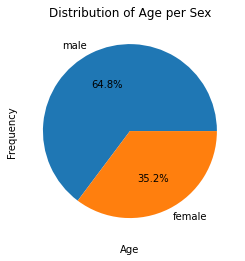

In [59]:
titanic['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age per Sex')

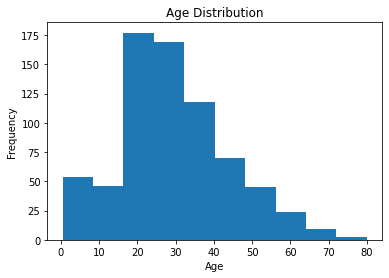

In [75]:
#Age Distribution
titanic['Age'].plot.hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

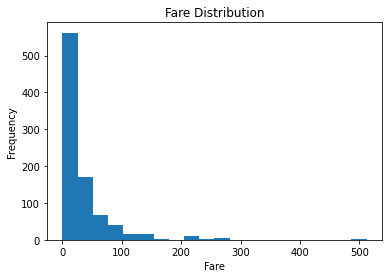

In [73]:
#Fare Distribution
titanic['Fare'].plot(kind='hist', bins=20)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

Plot the distribution of Age per Sex.

Text(0.5, 1.0, 'Distribution of Age per Sex')

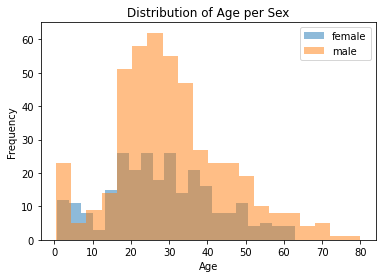

In [49]:
titanic.groupby('Sex')['Age'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age per Sex')

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

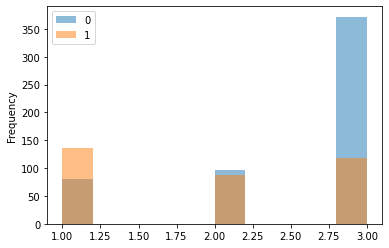

In [69]:
titanic.groupby('Survived')['Pclass'].plot(kind='hist', alpha=0.5, legend=True)

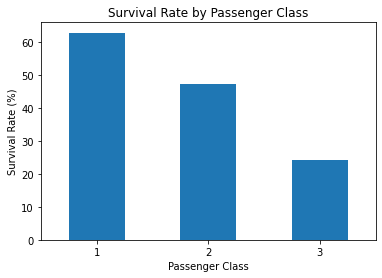

In [71]:
#Survival Rate by Passenger Class
(titanic.groupby('Pclass')['Survived'].mean() * 100).plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.show()

### Extra - loading large dataset

pandas provides data structures for in-memory analytics (RAM memory), which makes using pandas to analyze datasets that are larger than memory datasets somewhat tricky. Even datasets that are a sizable fraction of memory become unwieldy, as some pandas operations need to make intermediate copies.

1. Load less data

With `pandas.read_csv()`, you can specify usecols to limit the columns read into memory and userows to limit the rows read into memory. Not all file formats that can be read by pandas provide an option to read a subset of columns.

2. Use efficient datatypes: [dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes)

3. Use Chunking

Some workloads can be achieved with chunking by splitting a large problem into a bunch of small problems.

4. Use Dask

pandas is just one library offering a DataFrame API. Because of its popularity, pandas’ API has become something of a standard that other libraries implement. The pandas documentation maintains a list of libraries implementing a DataFrame API in the ecosystem page.

For example, [Dask](https://dask.org/), a parallel computing library, has [dask.dataframe](https://docs.dask.org/en/latest/dataframe.html), a pandas-like API for working with larger than memory datasets in parallel. Dask can use multiple threads or processes on a single machine, or a cluster of machines to process data in parallel.

One major difference: the dask.dataframe API is lazy

Parquet is a columnar storage file format that is commonly used in big data processing frameworks like Apache Spark and Apache Hadoop. It is designed to efficiently store and process large amounts of data by organizing data into columns rather than rows, which can lead to better compression and faster querying.

In [84]:
pd.read_parquet("../dataset/timeseries_wide.parquet").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525601 entries, 2000-01-01 00:00:00 to 2000-12-31 00:00:00
Data columns (total 40 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id_0    525601 non-null  int32  
 1   name_0  525601 non-null  object 
 2   x_0     525601 non-null  float64
 3   y_0     525601 non-null  float64
 4   id_1    525601 non-null  int32  
 5   name_1  525601 non-null  object 
 6   x_1     525601 non-null  float64
 7   y_1     525601 non-null  float64
 8   id_2    525601 non-null  int32  
 9   name_2  525601 non-null  object 
 10  x_2     525601 non-null  float64
 11  y_2     525601 non-null  float64
 12  id_3    525601 non-null  int32  
 13  name_3  525601 non-null  object 
 14  x_3     525601 non-null  float64
 15  y_3     525601 non-null  float64
 16  id_4    525601 non-null  int32  
 17  name_4  525601 non-null  object 
 18  x_4     525601 non-null  float64
 19  y_4     525601 non-null  float64
 20  id_5    525601

In [83]:
#only loads the columns we request
columns = ["id_0", "name_0", "x_0", "y_0"]

pd.read_parquet("../dataset/timeseries_wide.parquet", columns=columns).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525601 entries, 2000-01-01 00:00:00 to 2000-12-31 00:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id_0    525601 non-null  int32  
 1   name_0  525601 non-null  object 
 2   x_0     525601 non-null  float64
 3   y_0     525601 non-null  float64
dtypes: float64(2), int32(1), object(1)
memory usage: 18.0+ MB


In [100]:
#pandas.Categorical
titanic2 = titanic.copy()
titanic2['Title'] = titanic2['Title'].astype('category')
titanic2['PassengerId'] = pd.to_numeric(titanic2["PassengerId"], downcast="unsigned")
titanic2['Survived'] = pd.to_numeric(titanic2["Survived"], downcast="unsigned")
titanic2.memory_usage()

Index           128
PassengerId    1782
Survived        891
Pclass         7128
Name           7128
Sex            7128
Age            7128
SibSp          7128
Parch          7128
Ticket         7128
Fare           7128
Cabin          7128
Embarked       7128
Title          1583
dtype: int64

In [96]:
titanic.memory_usage()

Index           128
PassengerId    7128
Survived       7128
Pclass         7128
Name           7128
Sex            7128
Age            7128
SibSp          7128
Parch          7128
Ticket         7128
Fare           7128
Cabin          7128
Embarked       7128
Title          7128
dtype: int64